# Tutorial 09 - Frame Identification

In this tutorial we will look at how to extract individual frame images from the world video using [`pyav`](https://github.com/PyAV-Org/PyAV).

1. Define export location
1. Read world video timestamp file using `pandas`
1. Read world video file using `pyav`
1. Seek to a desired frame
1. Display the frame using `Pillow`

---
> To execute this notebook, download the [sample recording](https://drive.google.com/file/d/1-tVSpN1nA4WcV2mmG012AbZjMD-BIoXs/view?usp=sharing). Unzip and move it into the `recordings` directory for this repository.

Run cell below to install the requirements into your Python environment.

In [ ]:
!python -m pip install av Pillow pandas

## Imports and setup

In [2]:
import os

import av
import pandas as pd

In [3]:
path_to_export = "recordings/pupil_tutorial_09_frame_identification_recording_export"
path_to_timestamps = os.path.join(path_to_export, "world_timestamps.csv")
path_to_video = os.path.join(path_to_export, "world.mp4")

assert os.path.exists(path_to_timestamps)
assert os.path.exists(path_to_video)

## Loading and inspecting timestamps
The timestamps file includes two columns:
- Timestamps in [Pupil time](https://docs.pupil-labs.com/core/terminology/#_2-pupil-time),
- and their corresponding video-file internal time (pts)

For more information see [the world video export documentation](https://docs.pupil-labs.com/core/software/pupil-player/#world-video-exporter).

In [4]:
timestamps = pd.read_csv(path_to_timestamps)
timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   # timestamps [seconds]  2984 non-null   float64
 1   pts                     2984 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 46.8 KB


In [5]:
# Calculate scene video length
timestamps_in_pupil_time = timestamps["# timestamps [seconds]"]
timestamp_start, timestamp_end = timestamps_in_pupil_time.iloc[[0, -1]]
video_length_in_seconds = timestamp_end - timestamp_start
print(f"Video length in seconds: {video_length_in_seconds}")

Video length in seconds: 100.22960600000806


## Load video and show first frame

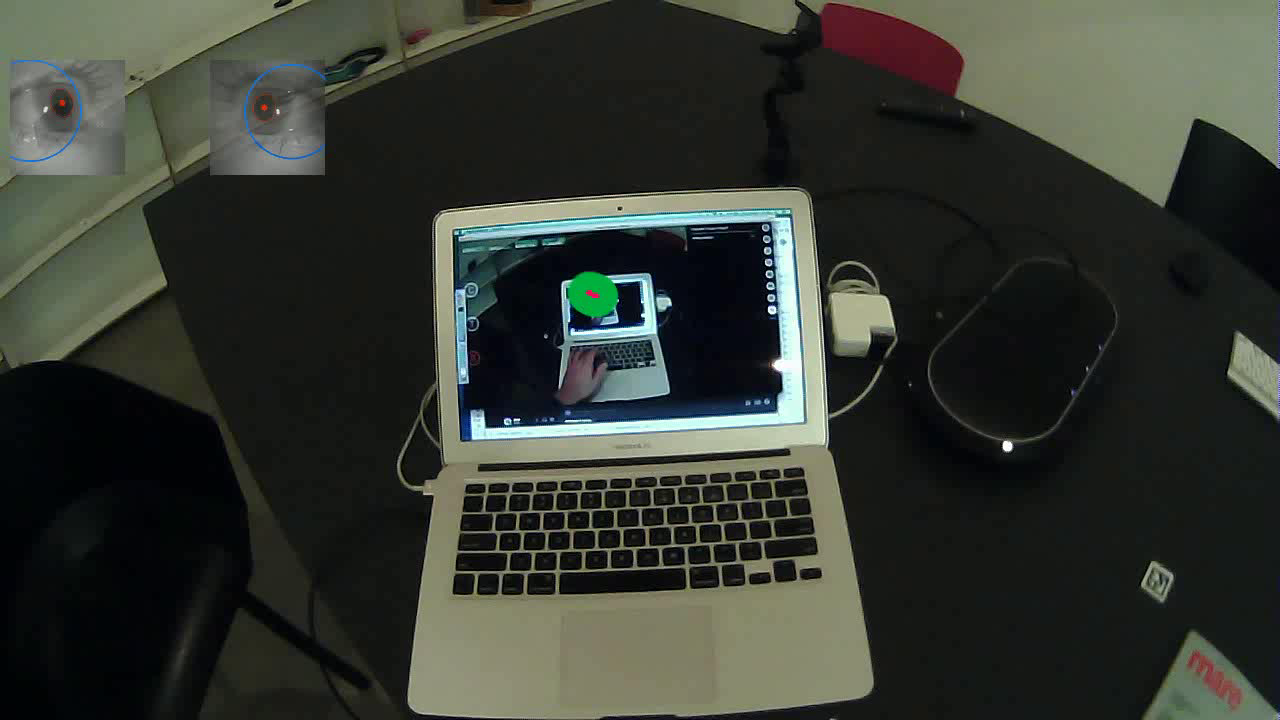

In [6]:
video = av.open(path_to_video)
frame = next(video.decode())
frame.to_image()

## Load video and seek to the 1200th frame
We will use the exported PTS to identify the 1200th frame.

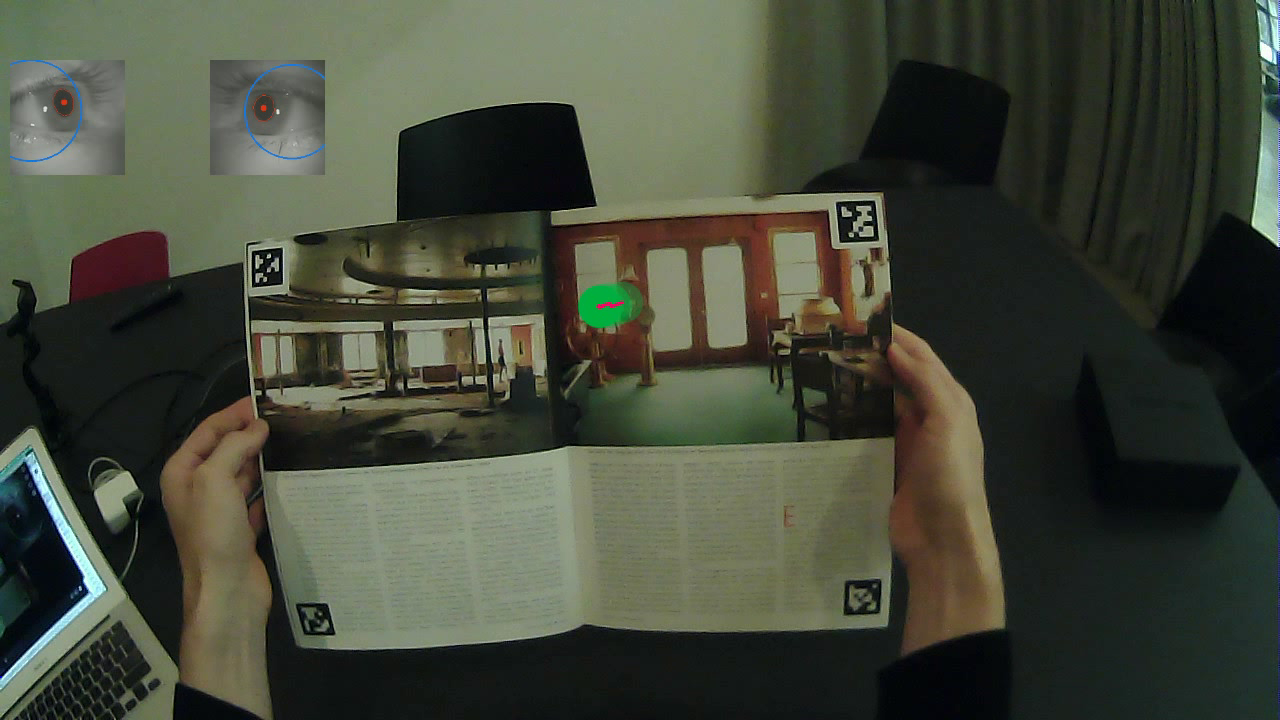

In [7]:
pts_of_1200th_frame = timestamps.pts.iloc[1200]
# requires primitive Python int
video.seek(int(pts_of_1200th_frame), stream=video.streams.video[0])
frame = next(video.decode())
frame.to_image()

## Load video and seek to closest frame at the 30-second mark
We use the Pupil timestamps to find the 30-second mark and look up its PTS.
Afterward, we seek to the desired frame.

30-second mark in Pupil time: 329383.719483
30-second mark frame index: 890
30-second mark in PTS: 1967709


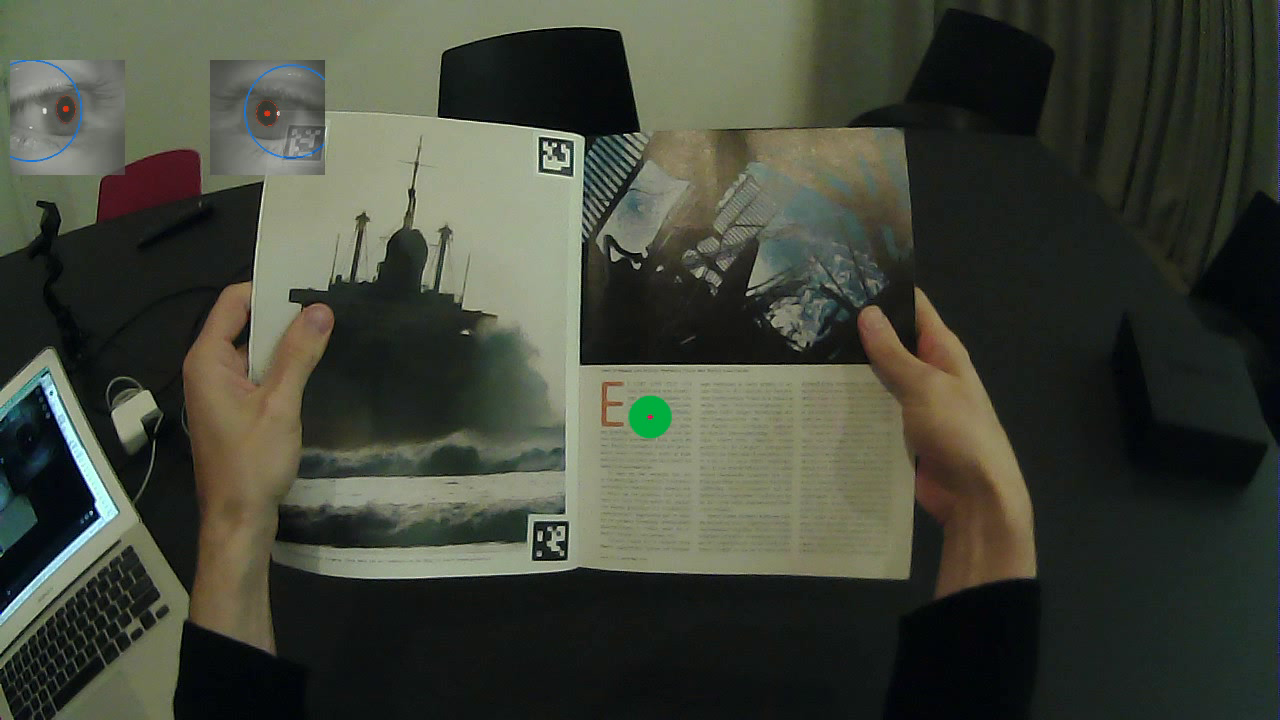

In [8]:
thirty_second_mark = timestamp_start + 30.0
print(f"30-second mark in Pupil time: {thirty_second_mark}")

idx_closest_to_30_sec_mark = timestamps_in_pupil_time.searchsorted(thirty_second_mark)
print(f"30-second mark frame index: {idx_closest_to_30_sec_mark}")

pts_closest_to_30_sec_mark = timestamps.pts.iloc[idx_closest_to_30_sec_mark]
print(f"30-second mark in PTS: {pts_closest_to_30_sec_mark}")

# requires primitive Python int
video.seek(int(pts_closest_to_30_sec_mark), stream=video.streams.video[0])
frame = next(video.decode())
frame.to_image()